# K-means and Hierarchical Clustering: make_blobs data

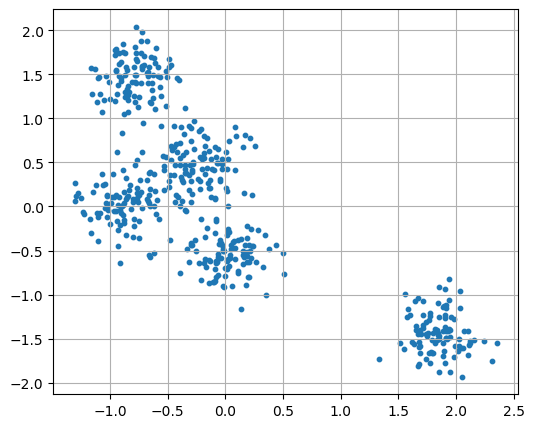

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Reference: https://kirenz.github.io/clustering/k-means.html

X, y_true = make_blobs(n_samples=500, 
                       centers=5,
                       cluster_std=0.80, 
                       random_state=0)

X = StandardScaler().fit_transform(X)

fig = plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=10)
plt.grid()
plt.show()

## Perform K-means clustering
Run K-means 10 times with different random initialization. Only the best result, in terms of inertia, is returned.
By default, the initializer is "random" which is Forgy initialization.

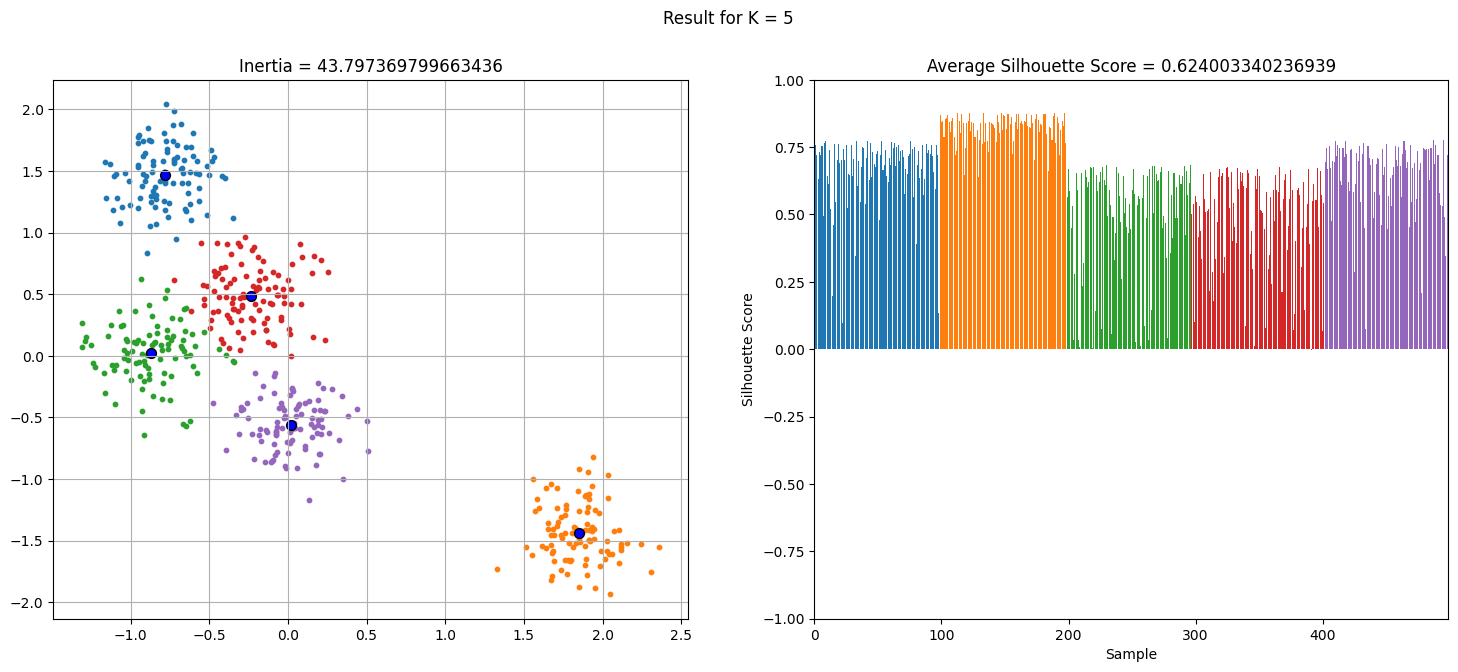

In [2]:
K = 5
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
fig.suptitle(f"Result for K = {K}")
for i in range(0,K):
    ax1.scatter(X[cluster_labels == i,0], X[cluster_labels == i,1], s=10)
ax1.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
ax1.set_title(f"Inertia = {inertia}")
ax1.grid()
sample = 0
for i in range(0,K):
    sil = silhouette_values[cluster_labels == i]
    ax2.bar(np.arange(sample,sample + sil.size),sil)
    sample = sample + sil.size
ax2.axis([0, 499, -1, 1])
ax2.set_xlabel('Sample')
ax2.set_ylabel('Silhouette Score')
ax2.set_title(f"Average Silhouette Score = {silhouette_avg}")
plt.show()

## Vary K then Evaluate
Let's see the Inertia (Elbow Method) and Silhouette Scores for various K.

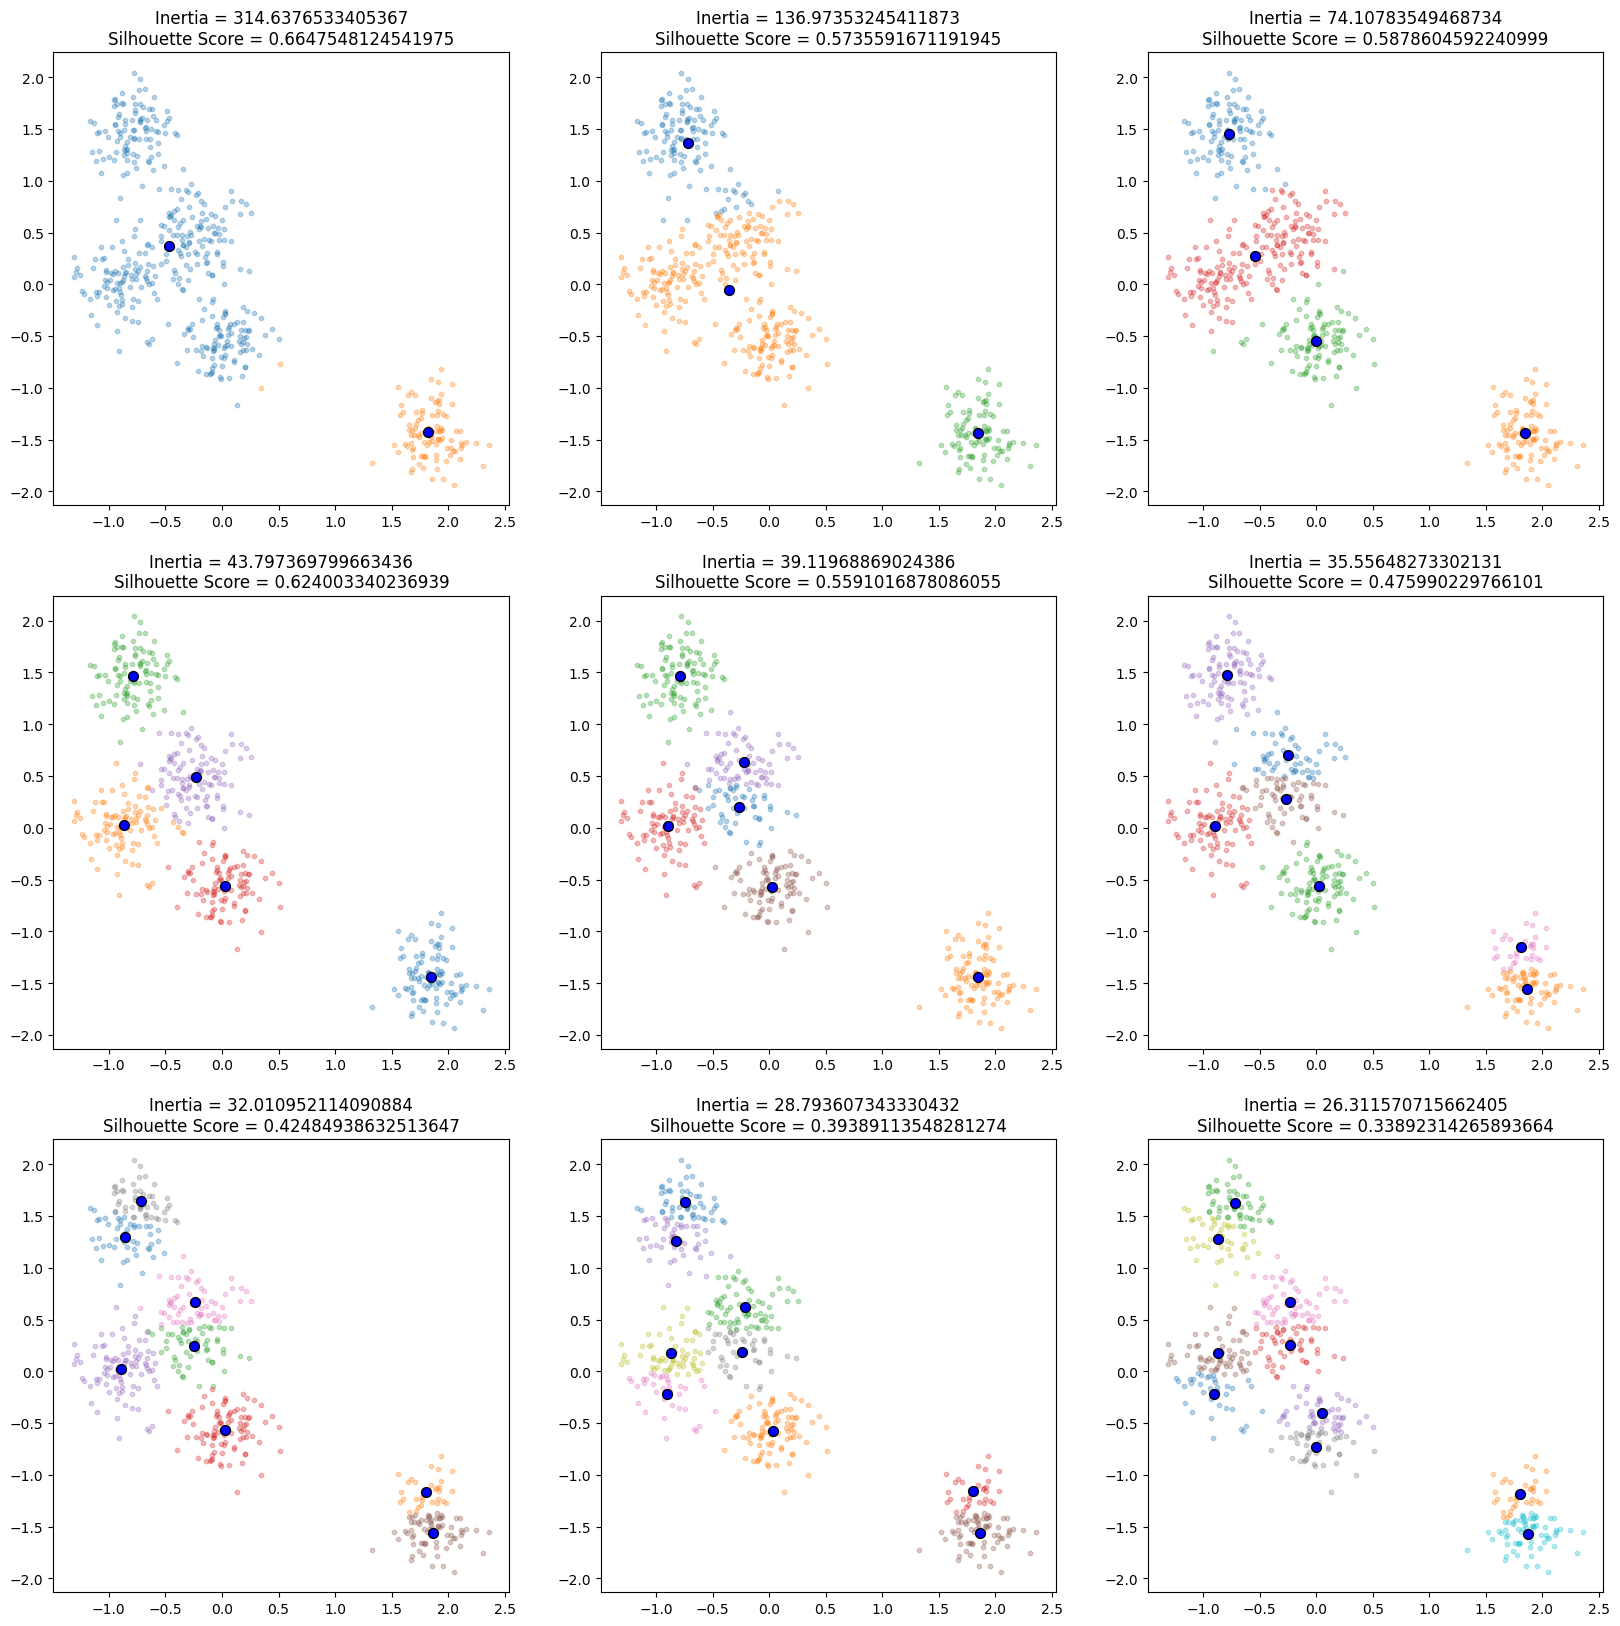

In [3]:
inertia_values = []
silhouette_avgs = []
fig2 = plt.figure(figsize=(20,20))
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(X)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    ax = fig2.add_subplot(330 + i - 1)
    for j in range(0,i):
        ax.scatter(X[cluster_labels == j,0], X[cluster_labels == j,1], s=10, alpha=0.3)
    ax.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
    ax.set_title(f"Inertia = {kmeans.inertia_}\nSilhouette Score = {silhouette_avg}")

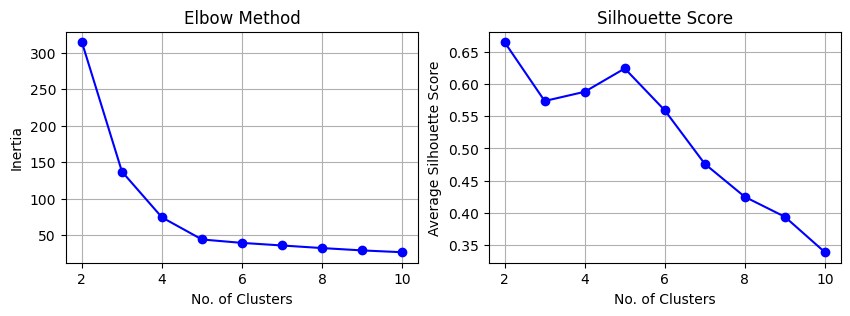

In [4]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(np.arange(2,11),inertia_values,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(122)
plt.plot(np.arange(2,11),silhouette_avgs,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.show()

## Perform Hierarchical Clustering
We'll do Agglomerative Clustering with various linkages. But since sklearn has no dendrogram feature, we'll use scipy.
Warning: The dendrogram takes a long time to run because there are 500 data points.

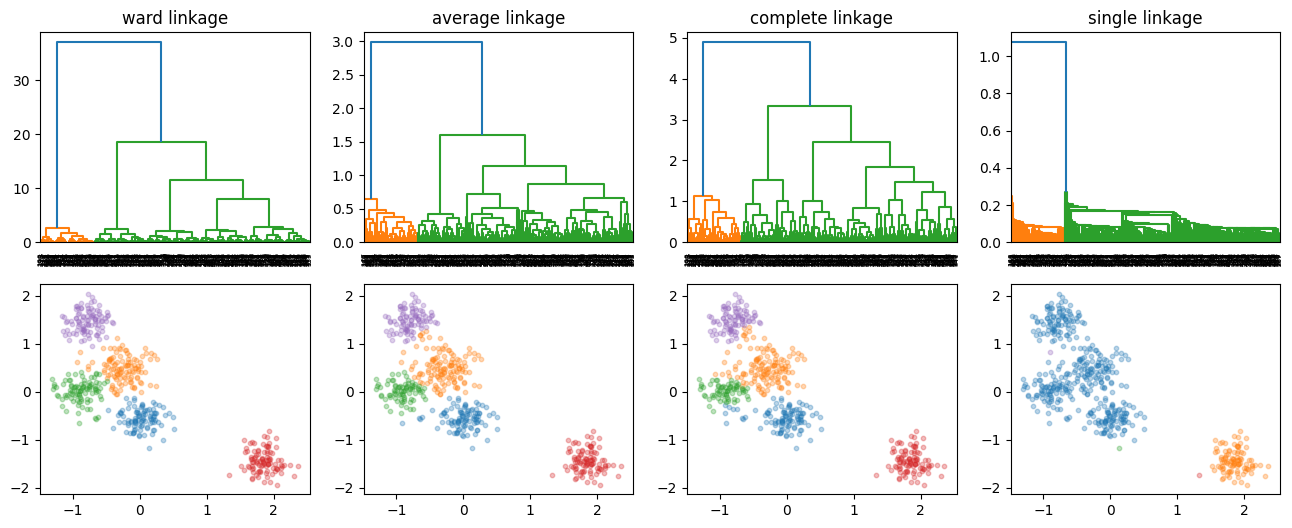

Elapsed Time: 40.13799977302551 sec


In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from time import time

fig3 = plt.figure(figsize=(16,6))
ctr = 1
t0 = time()
for method in ('ward', 'average', 'complete', 'single'):
    Z = linkage(X, method=method)
    ax = fig3.add_subplot(240 + ctr)
    ax.set_title("%s linkage" % method)
    dendrogram(Z)
    cutree = cut_tree(Z, n_clusters=5).flatten()
    ax = fig3.add_subplot(240 + ctr + 4)
    for j in range(0,5):
        ax.scatter(X[cutree == j,0], X[cutree == j,1], s=10, alpha=0.3)
    ctr += 1

plt.show()
print(f"Elapsed Time: {time()-t0} sec")